### Loading the dataset

In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.
C:\Users\610118\AppData\Local\Continuum\anaconda2\envs\notebook-myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\610118\AppData\Local\Continuum\anaconda2\envs\notebook-myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\610118\AppData\Local\Continuum\anaconda2\envs\notebook-myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)typ

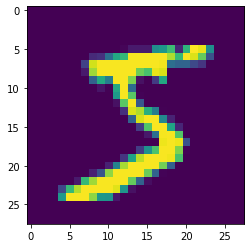

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
#plot the first image in the dataset
plt.imshow(X_train[0])

In [3]:
#check image shape
X_train[0].shape

(28, 28)

In [4]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [5]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Building the model

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dropout

#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))

model.add(MaxPooling2D(pool_size=10))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

W0808 12:15:35.214580  7080 deprecation_wrapper.py:119] From C:\Users\610118\AppData\Local\Continuum\anaconda2\envs\notebook-myenv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0808 12:15:35.259542  7080 deprecation_wrapper.py:119] From C:\Users\610118\AppData\Local\Continuum\anaconda2\envs\notebook-myenv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0808 12:15:35.263540  7080 deprecation_wrapper.py:119] From C:\Users\610118\AppData\Local\Continuum\anaconda2\envs\notebook-myenv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0808 12:15:35.300515  7080 deprecation_wrapper.py:119] From C:\Users\610118\AppData\Local\Continuum\anaconda2\envs\notebook-myenv\lib\site-packages\keras\backend\tens

In [7]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0808 12:15:35.355481  7080 deprecation_wrapper.py:119] From C:\Users\610118\AppData\Local\Continuum\anaconda2\envs\notebook-myenv\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0808 12:15:35.383464  7080 deprecation_wrapper.py:119] From C:\Users\610118\AppData\Local\Continuum\anaconda2\envs\notebook-myenv\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
#train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

W0808 12:15:35.584336  7080 deprecation.py:323] From C:\Users\610118\AppData\Local\Continuum\anaconda2\envs\notebook-myenv\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 171s 3ms/step - loss: 14.4344 - acc: 0.1043 - val_loss: 14.4612 - val_acc: 0.1028
Epoch 2/10
60000/60000 [==============================] - 172s 3ms/step - loss: 14.1717 - acc: 0.1205 - val_loss: 14.1702 - val_acc: 0.1205
Epoch 3/10
60000/60000 [==============================] - 173s 3ms/step - loss: 13.6661 - acc: 0.1519 - val_loss: 13.0904 - val_acc: 0.1875
Epoch 4/10
60000/60000 [==============================] - 174s 3ms/step - loss: 13.0133 - acc: 0.1922 - val_loss: 11.3655 - val_acc: 0.2946
Epoch 5/10
60000/60000 [==============================] - 171s 3ms/step - loss: 11.5065 - acc: 0.2851 - val_loss: 10.3223 - val_acc: 0.3585
Epoch 6/10
60000/60000 [==============================] - 173s 3ms/step - loss: 8.9276 - acc: 0.4441 - val_loss: 7.1304 - val_acc: 0.5571
Epoch 7/10
60000/60000 [==============================] - 176s 3ms/step - loss: 7.6523 - acc: 0.5238 - val_loss:

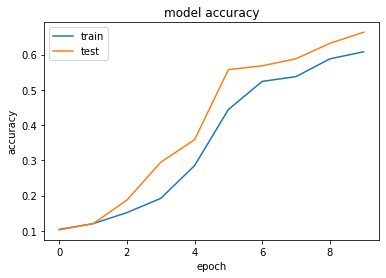

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

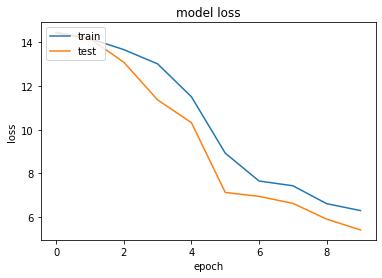

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()